In [22]:
#%matplotlib inlin
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import random

In [23]:
#** code for plotting **

step_size = 10
start_color = np.array([0,0,255]) #green
goal_color = np.array([0,255,0]) #red
fire_color = np.array([0,0,0])#black

def plot_fire(fire_matrix, dim):
    fig = plt.figure()

    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0


    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color
    plt.xticks([], [])
    plt.yticks([], [])
    
    for i in range(dim):
        for j in range(dim):
            if fire_matrix[i][j] == 1:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = fire_color
    plt.imshow(prob_map)

Enter dimension of maze: 10
Enter probability of fire: 0.1
10
0.1


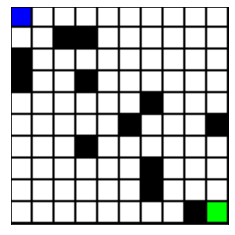

In [32]:
#take input from user
dim = int(input("Enter dimension of maze: "))
p = float(input("Enter probability of fire: "))

print(dim)
print(p)

fire_matrix = [ [ 0 for i in range(dim) ] for j in range(dim) ] 

for i in range(dim):
    for j in range(dim):
        if i == 0 and j == 0 or i == dim-1 and j == dim-1:
            continue
        if random.uniform(0,1) < p:
            fire_matrix[i][j] = 1
            
plot_fire(fire_matrix, dim)

In [ ]:
#DFS search
transitions = [(1,0),(-1,0),(0,1),(0,-1)]
start = (0,0)
goal = (dim-1, dim-1)
explored_spaces = set([])
fringe = [start]

parent_map = [[(0,0) for i in range(dim)] for i in range(dim)]
parent_fringe = [(-1,-1)]

while len(fringe) > 0:
    